# Association Rule Mining
1. Unsupervised learning technique
2. For non-numeric, categorical data
3. Discover frequent patterns, correlations, or associations from datasets

## Apriori 演算法

### Principle:
1. Any subset of a frequent itemset must be frequent  
    * if {beer, diaper, nuts} is frequent, so is {beer, diaper}
2. Every transaction having {beer, diaper, nuts} also contains {beer, diaper}
3.  If there is any itemset which is infrequent, its superset should not be generated/tested!

### Step:  
![flow chart](./flow_chart.jpg)

## Support / Confidence / Lift
### Support
Support rate refers to the default popularity of an item and can be calculated by finding number of transactions containing a particular item divided by total number of transactions. Suppose we want to find support for item 5.
### Support(5) = (Transactions containing (5))/(Total Transactions) = 3/4

### Confidence
Confidence refers to the likelihood that the item "5" is also bought if item "3" is bought. Confidence (3->5) can be calculated by finding the number of transactions where "3" and "5" are bought together, divided by total number of transactions where "3" is bought. 
### Confidence(3→5) = (Transactions containing both (3 and 5))/(Transactions containing 3) = 2/3

### Lift
Lift(3 -> 5) refers to the increase in the ratio of sale of 5 when 3 is sold. Lift(3 –> 5) can be calculated by calculating Confidence(3 -> 5) divided by Support(5).
### Lift(3 -> 5) = (Confidence (3→5))/(Support (5)) = (2/3)/(3/4)=8/9  

In [1]:
import associaion_rule

In [2]:
associaion_rule.Apriori.fit??

## FP Tree 演算法

1. Scan DB once, find frequent 1-itemset (single item pattern)
2. Order frequent items in frequency descending order
3. Scan DB again, construct FP-tree
4. Construct conditional pattern base for each node in the FP-tree
5. Construct conditional FP-tree from each conditional pattern-base
6. Recursively mine conditional FP-trees and grow frequent patterns obtained so far

In [3]:
associaion_rule.FPTree._construct_fptree??

In [ ]:
associaion_rule.FPTree._generate_cond_pattern_bases??

In [ ]:
associaion_rule.FPTree._mine_subtree??

## 簡單的範例

In [2]:
transactions = [
    ('f', 'a', 'c', 'd', 'g', 'i', 'm', 'p'),
    ('a', 'b', 'c', 'f', 'l', 'm', 'o'),
    ('b', 'f', 'h', 'j', 'o'),
    ('b', 'c', 'k', 's', 'p'),
    ('a', 'f', 'c', 'e', 'l', 'p', 'm', 'n'),
]

In [3]:
apriori = associaion_rule.Apriori()
apriori.fit(transactions, support_rate=0.5)
apriori.patterns

[(('f',), 0.8),
 (('b',), 0.6),
 (('p',), 0.6),
 (('c',), 0.8),
 (('m',), 0.6),
 (('a',), 0.6),
 (('p', 'c'), 0.6),
 (('f', 'c'), 0.6),
 (('f', 'm'), 0.6),
 (('f', 'a'), 0.6),
 (('c', 'm'), 0.6),
 (('c', 'a'), 0.6),
 (('m', 'a'), 0.6),
 (('f', 'c', 'm'), 0.6),
 (('f', 'c', 'a'), 0.6),
 (('f', 'm', 'a'), 0.6),
 (('c', 'm', 'a'), 0.6),
 (('c', 'm', 'a', 'f'), 0.6)]

In [4]:
fptree = associaion_rule.FPTree()
fptree.fit(transactions, support_rate=0.5)
fptree.patterns

[(('p',), 0.6),
 (('f',), 0.8),
 (('f', 'm'), 0.6),
 (('c',), 0.8),
 (('c', 'f'), 0.6),
 (('c', 'f', 'm'), 0.6),
 (('c', 'm'), 0.6),
 (('c', 'p'), 0.6),
 (('m',), 0.6),
 (('a',), 0.6),
 (('a', 'c'), 0.6),
 (('a', 'c', 'f'), 0.6),
 (('a', 'c', 'f', 'm'), 0.6),
 (('a', 'c', 'm'), 0.6),
 (('a', 'f'), 0.6),
 (('a', 'f', 'm'), 0.6),
 (('a', 'm'), 0.6),
 (('b',), 0.6)]

## 使用關聯規則挖掘演算法分析台積電(2330)股市

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
stock = pd.read_csv('2330.TW.csv')
stock['Date'] = pd.to_datetime(stock['Date'])
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,69.649002,69.649002,68.475197,69.649002,37.328552,2.006623e+11
1,2000-01-05,69.649002,71.214104,68.866302,71.214104,38.167374,4.024668e+11
2,2000-01-06,70.822899,71.214104,69.649002,69.649002,37.328552,1.975457e+11
3,2000-01-07,67.301300,68.475197,66.518600,67.692497,36.279961,2.352703e+11
4,2000-01-10,69.649002,70.431396,68.475197,70.040199,37.538216,2.761717e+11


計算收盤價變化量

In [7]:
stock['CloseAdj'] = stock['Close'] - stock['Close'].shift(1)
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,CloseAdj
0,2000-01-04,69.649002,69.649002,68.475197,69.649002,37.328552,2.006623e+11,NaN
1,2000-01-05,69.649002,71.214104,68.866302,71.214104,38.167374,4.024668e+11,1.565102
2,2000-01-06,70.822899,71.214104,69.649002,69.649002,37.328552,1.975457e+11,-1.565102
3,2000-01-07,67.301300,68.475197,66.518600,67.692497,36.279961,2.352703e+11,-1.956505
4,2000-01-10,69.649002,70.431396,68.475197,70.040199,37.538216,2.761717e+11,2.347702


計算連續上升天數

In [8]:
def generate_continuous(stock_adjs):
    continuous = 0
    for adj in stock_adjs:
        if adj > 0:
            continuous += 1
        else:
            continuous = 0
        yield continuous

In [11]:
stock['Continuous'] = list(generate_continuous(stock['CloseAdj']))
stock.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,CloseAdj,Continuous
0,2000-01-04,69.649002,69.649002,68.475197,69.649002,37.328552,2.006623e+11,NaN,0
1,2000-01-05,69.649002,71.214104,68.866302,71.214104,38.167374,4.024668e+11,1.565102,1
2,2000-01-06,70.822899,71.214104,69.649002,69.649002,37.328552,1.975457e+11,-1.565102,0
3,2000-01-07,67.301300,68.475197,66.518600,67.692497,36.279961,2.352703e+11,-1.956505,0
4,2000-01-10,69.649002,70.431396,68.475197,70.040199,37.538216,2.761717e+11,2.347702,1
5,2000-01-11,70.822899,71.605202,68.475197,68.866302,36.909061,2.777695e+11,-1.173897,0
6,2000-01-12,69.257500,70.822899,68.866302,70.822899,37.957710,2.162468e+11,1.956597,1
7,2000-01-13,70.822899,70.822899,69.649002,69.649002,37.328552,1.474909e+11,-1.173897,0
8,2000-01-14,70.431396,72.387901,70.040199,71.214104,38.167374,2.883189e+11,1.565102,1
9,2000-01-17,74.344398,74.344398,73.170601,73.170601,39.215965,1.552569e+11,1.956497,2


### 移動平均線(MA)
移動平均線(MA)是投資人的平均成本

In [12]:
stock['MovingAverage5'] = stock['Close'].rolling(window=5).mean()
stock['MovingAverage10'] = stock['Close'].rolling(window=10).mean()
stock.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,CloseAdj,Continuous,MovingAverage5,MovingAverage10
0,2000-01-04,69.649002,69.649002,68.475197,69.649002,37.328552,2.006623e+11,NaN,0,NaN,NaN
1,2000-01-05,69.649002,71.214104,68.866302,71.214104,38.167374,4.024668e+11,1.565102,1,NaN,NaN
2,2000-01-06,70.822899,71.214104,69.649002,69.649002,37.328552,1.975457e+11,-1.565102,0,NaN,NaN
3,2000-01-07,67.301300,68.475197,66.518600,67.692497,36.279961,2.352703e+11,-1.956505,0,NaN,NaN
4,2000-01-10,69.649002,70.431396,68.475197,70.040199,37.538216,2.761717e+11,2.347702,1,69.648961,NaN
5,2000-01-11,70.822899,71.605202,68.475197,68.866302,36.909061,2.777695e+11,-1.173897,0,69.492421,NaN
6,2000-01-12,69.257500,70.822899,68.866302,70.822899,37.957710,2.162468e+11,1.956597,1,69.414180,NaN
7,2000-01-13,70.822899,70.822899,69.649002,69.649002,37.328552,1.474909e+11,-1.173897,0,69.414180,NaN
8,2000-01-14,70.431396,72.387901,70.040199,71.214104,38.167374,2.883189e+11,1.565102,1,70.118501,NaN
9,2000-01-17,74.344398,74.344398,73.170601,73.170601,39.215965,1.552569e+11,1.956497,2,70.744582,70.196771


### 乖離率(BIAS)
投資者的平均報酬率，乖離率過大時，表示股票在高點，有很大的機率會下跌；乖離率過小時，表示股票在低點，有很大的機率會上漲。

* 投資報酬率公式：
$$ \frac{目前價-成本價}{成本價} $$
* 乖離率公式：
$$ \frac{目前價-移動平均價格}{移動平均價格} $$

In [13]:
stock['BIAS5'] = (stock['Close'] - stock['MovingAverage5']) / stock['MovingAverage5']
stock['BIAS10'] = (stock['Close'] - stock['MovingAverage10']) / stock['MovingAverage10']
stock.head(50)

,Date,Open,High,Low,Close,Adj Close,Volume,CloseAdj,Continuous,MovingAverage5,MovingAverage10,BIAS5,BIAS10
0,2000-01-04,69.649002,69.649002,68.475197,69.649002,37.328552,2.006623e+11,NaN,0,NaN,NaN,NaN,NaN
1,2000-01-05,69.649002,71.214104,68.866302,71.214104,38.167374,4.024668e+11,1.565102,1,NaN,NaN,NaN,NaN
2,2000-01-06,70.822899,71.214104,69.649002,69.649002,37.328552,1.975457e+11,-1.565102,0,NaN,NaN,NaN,NaN
3,2000-01-07,67.301300,68.475197,66.518600,67.692497,36.279961,2.352703e+11,-1.956505,0,NaN,NaN,NaN,NaN
4,2000-01-10,69.649002,70.431396,68.475197,70.040199,37.538216,2.761717e+11,2.347702,1,69.648961,NaN,5.617287e-03,NaN
5,2000-01-11,70.822899,71.605202,68.475197,68.866302,36.909061,2.777695e+11,-1.173897,0,69.492421,NaN,-9.009886e-03,NaN
6,2000-01-12,69.257500,70.822899,68.866302,70.822899,37.957710,2.162468e+11,1.956597,1,69.414180,NaN,2.029440e-02,NaN
7,2000-01-13,70.822899,70.822899,69.649002,69.649002,37.328552,1.474909e+11,-1.173897,0,69.414180,NaN,3.382914e-03,NaN
8,2000-01-14,70.431396,72.387901,70.040199,71.214104,38.167374,2.883189e+11,1.565102,1,70.118501,NaN,1.562502e-02,NaN
9,2000-01-17,74.344398,74.344398,73.170601,73.170601,39.215965,1.552569e+11,1.956497,2,70.744582,70.196771,3.429265e-02,0.042364


## 股市四大買賣點

### 買點: 量大收紅、量縮價不跌、五日均價由下往上、五日均價大於十日均價

### 賣點: 量大收黑、量縮價跌、五日均價由上往下、五日均價小於十日均價

In [14]:
stock['BestBuy1'] = ((stock['Volume'] > stock['Volume'].shift(1)) 
                     & (stock['Close'] > stock['Close'].shift(1)))
stock['BestBuy2'] = ((stock['Volume'] < stock['Volume'].shift(1)) 
                     & (stock['Close'] > stock['Close'].shift(1)))
stock['BestBuy3'] = ((stock['MovingAverage5'] > stock['MovingAverage5'].shift(1))
                     & (stock['MovingAverage5'].shift(1) > stock['MovingAverage5'].shift(2)))
stock['BestBuy4'] = stock['MovingAverage5'] > stock['MovingAverage10']

In [15]:
stock['BestSell1'] = ((stock['Volume'] > stock['Volume'].shift(1)) 
                     & (stock['Close'] < stock['Close'].shift(1)))
stock['BestSell2'] = ((stock['Volume'] < stock['Volume'].shift(1)) 
                     & (stock['Close'] < stock['Close'].shift(1)))
stock['BestSell3'] = ((stock['MovingAverage5'] < stock['MovingAverage5'].shift(1))
                     & (stock['MovingAverage5'].shift(1) < stock['MovingAverage5'].shift(2)))
stock['BestSell4'] = stock['MovingAverage5'] < stock['MovingAverage10']

In [17]:
stock.dropna(inplace=True)
stock.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,CloseAdj,Continuous,MovingAverage5,...,BIAS5,BIAS10,BestBuy1,BestBuy2,BestBuy3,BestBuy4,BestSell1,BestSell2,BestSell3,BestSell4
9,2000-01-17,74.344398,74.344398,73.170601,73.170601,39.215965,1.552569e+11,1.956497,2,70.744582,...,0.034293,0.042364,False,True,True,True,False,False,False,False
10,2000-01-18,73.170601,73.170601,71.605202,71.996696,38.586811,1.316480e+11,-1.173905,0,71.370660,...,0.008772,0.022222,False,False,True,True,False,True,False,False
11,2000-01-19,71.996696,73.170601,71.605202,71.996696,38.586811,1.348487e+11,0.000000,0,71.605420,...,0.005464,0.021088,False,False,True,True,False,False,False,False
12,2000-01-20,71.996696,71.996696,70.822899,71.214104,38.167374,1.257581e+11,-0.782592,0,71.918440,...,-0.009794,0.007752,False,False,True,True,False,True,False,False
13,2000-01-21,71.214104,72.779099,71.214104,72.779099,39.006138,1.133974e+11,1.564995,1,72.231439,...,0.007582,0.022538,False,True,True,True,False,False,False,False
14,2000-01-24,73.561798,74.735603,73.170601,73.561798,39.425625,1.751131e+11,0.782699,2,72.309679,...,0.017316,0.028446,True,False,True,True,False,False,False,False
15,2000-01-25,75.518303,75.518303,74.344398,75.518303,40.474213,2.236921e+11,1.956505,3,73.014000,...,0.034299,0.046071,True,False,True,True,False,False,False,False
16,2000-01-26,77.865997,80.604797,77.865997,80.604797,43.200333,3.578810e+11,5.086494,4,74.735620,...,0.078533,0.101602,True,False,True,True,False,False,False,False
17,2000-01-27,81.387497,82.561401,79.822502,81.387497,43.619835,2.879272e+11,0.782700,5,76.770299,...,0.060143,0.094737,False,True,True,True,False,False,False,False
18,2000-01-28,78.648300,79.822502,78.648300,79.822502,42.781067,1.979048e+11,-1.564995,0,78.178979,...,0.021023,0.061396,False,False,True,True,False,True,False,False


## 連續資料離散化
當計算完以上的欄位以後，我們想要進行各個欄位之間的關聯規則分析，在開始之前，我們將需要將表中的連續資料轉換成類別資料才有辦法套入演算法，這裡我們使用分群演算法來將連續數值轉為離散的資料。

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [20]:
def draw_elbow_line(data, ks=range(2, 50), n_iters=5):
    sses = []
    for k in ks:
        sum_sse = 0
        for seed in range(n_iters):
            kmeans = KMeans(n_clusters=k, random_state=seed, n_jobs=-1)
            kmeans.fit(data)
            sum_sse += kmeans.inertia_
        sses.append(sum_sse / n_iters)
    
    plt.plot(ks, sses)

C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\us

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning:

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning:

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning:

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning:

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning:

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning:

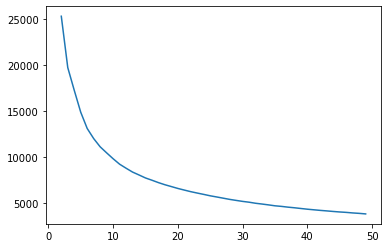

In [23]:
cols = [
    'Close', 
    'Volume', 
    'CloseAdj', 
    'MovingAverage5', 
    'MovingAverage10', 
    'Continuous', 
    'BIAS5',
    'BIAS10',
]
draw_elbow_line(scale(stock[cols]))

In [24]:
kmeans = KMeans(n_clusters=10, random_state=0, n_jobs=-1)
kmeans.fit(scale(stock[cols]))
stock['Label'] = kmeans.labels_
stock['Label'] = stock['Label'].astype('str')

C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [27]:
stock['Label'].head(20)

9     8
10    1
11    1
12    1
13    1
14    8
15    8
16    8
17    8
18    8
19    8
20    1
21    6
22    6
23    3
24    3
25    3
26    8
27    8
28    8
Name: Label, dtype: object

## 關聯規則分析

In [29]:
def generate_transaction(stock_row):
    bool_cols = [
        'BestBuy1', 
        'BestBuy2', 
        'BestBuy3',
        'BestBuy4',
        'BestSell1',
        'BestSell2',
        'BestSell3',
        'BestSell4',
    ]
    transaction = tuple(col for col in bool_cols if stock_row[col])
    return transaction+(stock_row['Label'], )

In [31]:
transactions = list(stock.apply(generate_transaction, axis='columns'))
transactions[:20]

[('BestBuy2', 'BestBuy3', 'BestBuy4', '8'),
 ('BestBuy3', 'BestBuy4', 'BestSell2', '1'),
 ('BestBuy3', 'BestBuy4', '1'),
 ('BestBuy3', 'BestBuy4', 'BestSell2', '1'),
 ('BestBuy2', 'BestBuy3', 'BestBuy4', '1'),
 ('BestBuy1', 'BestBuy3', 'BestBuy4', '8'),
 ('BestBuy1', 'BestBuy3', 'BestBuy4', '8'),
 ('BestBuy1', 'BestBuy3', 'BestBuy4', '8'),
 ('BestBuy2', 'BestBuy3', 'BestBuy4', '8'),
 ('BestBuy3', 'BestBuy4', 'BestSell2', '8'),
 ('BestBuy3', 'BestBuy4', 'BestSell2', '8'),
 ('BestBuy3', 'BestBuy4', 'BestSell2', '1'),
 ('BestBuy4', '6'),
 ('BestBuy4', 'BestSell3', '6'),
 ('BestBuy4', 'BestSell3', '3'),
 ('BestSell3', 'BestSell4', '3'),
 ('BestSell4', '3'),
 ('BestBuy1', 'BestBuy4', '8'),
 ('BestBuy2', 'BestBuy3', 'BestBuy4', '8'),
 ('BestBuy1', 'BestBuy3', 'BestBuy4', '8')]

In [32]:
apriori = associaion_rule.Apriori()
apriori.fit(transactions, support_rate=0.1)
print(len(apriori.patterns))
apriori.patterns

28


[(('BestBuy3',), 0.40693590869183494),
 (('BestSell2',), 0.2271729587357331),
 (('BestBuy2',), 0.218612818261633),
 (('7',), 0.12949956101843724),
 (('6',), 0.20654082528533801),
 (('3',), 0.2271729587357331),
 (('BestSell1',), 0.218612818261633),
 (('BestBuy4',), 0.5327041264266901),
 (('BestSell3',), 0.33801580333625986),
 (('BestSell4',), 0.4626865671641791),
 (('BestBuy1',), 0.247585601404741),
 (('1',), 0.10030728709394206),
 (('BestBuy3', 'BestBuy4'), 0.35864793678665496),
 (('BestBuy3', '6'), 0.11501316944688324),
 (('BestBuy3', 'BestBuy1'), 0.12532923617208078),
 (('BestSell2', 'BestBuy4'), 0.1297190517998244),
 (('BestBuy2', 'BestBuy4'), 0.10864793678665496),
 (('BestBuy2', 'BestSell4'), 0.1093064091308165),
 (('BestSell1', 'BestSell3'), 0.10206321334503951),
 (('BestSell1', 'BestSell4'), 0.1202809482001756),
 (('BestBuy4', '6'), 0.13388937664618086),
 (('BestBuy4', 'BestBuy1'), 0.14749780509218613),
 (('BestSell3', 'BestSell4'), 0.2848990342405619),
 (('BestSell3', '3'), 0.13

In [33]:
fptree = associaion_rule.FPTree()
fptree.fit(transactions, support_rate=0.1)
print(len(fptree.patterns))
fptree.patterns

28


[(('BestBuy4',), 0.5327041264266901),
 (('BestBuy4', 'BestSell2'), 0.1297190517998244),
 (('BestBuy3',), 0.40693590869183494),
 (('BestBuy3', 'BestBuy4'), 0.35864793678665496),
 (('BestBuy2',), 0.218612818261633),
 (('BestBuy2', 'BestBuy4'), 0.10864793678665496),
 (('BestBuy2', 'BestSell4'), 0.1093064091308165),
 (('BestSell2',), 0.2271729587357331),
 (('1',), 0.10030728709394206),
 (('BestBuy1',), 0.247585601404741),
 (('BestBuy1', 'BestBuy3'), 0.12532923617208078),
 (('BestBuy1', 'BestBuy3', 'BestBuy4'), 0.11391571553994732),
 (('BestBuy1', 'BestBuy4'), 0.14749780509218613),
 (('6',), 0.20654082528533801),
 (('6', 'BestBuy4'), 0.13388937664618086),
 (('6', 'BestBuy3'), 0.11501316944688324),
 (('6', 'BestBuy3', 'BestBuy4'), 0.10425812115891132),
 (('BestSell3',), 0.33801580333625986),
 (('BestSell3', 'BestSell4'), 0.2848990342405619),
 (('3',), 0.2271729587357331),
 (('3', 'BestSell3'), 0.1321334503950834),
 (('3', 'BestSell3', 'BestSell4'), 0.11172080772607551),
 (('3', 'BestSell4'),